## Import Tools

In [1]:
import torch
import torch.nn as nn
import numpy as np
import scipy.io 
import random
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
import seaborn as sn
import pandas as pd
os.environ['KMP_DUPLICATE_LIB_OK']='True' 

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

## Dataset Processing 

### Read in the original dataset 

In [2]:
train_dl_origin = torch.load('Dataset/train_dl.pt')
valid_dl_origin = torch.load('Dataset/valid_dl.pt')

train_CSI = train_dl_origin.dataset[:][0]
train_label = train_dl_origin.dataset[:][1][:,2].type(torch.LongTensor)

valid_CSI = valid_dl_origin.dataset[:][0]
valid_label = valid_dl_origin.dataset[:][1][:,2].type(torch.LongTensor)

### CSI Processing Method 1: Take Modulus of complex matrices

In [3]:
train_CSI_modulus = torch.abs(train_CSI)
valid_CSI_modulus = torch.abs(valid_CSI)

### Show the size of the training and valiation dataset

In [4]:
print(train_CSI_modulus.shape)
print(valid_CSI_modulus.shape)

torch.Size([15000, 1, 4, 1632])
torch.Size([5000, 1, 4, 1632])


### Show a pilot signal in frequence domain

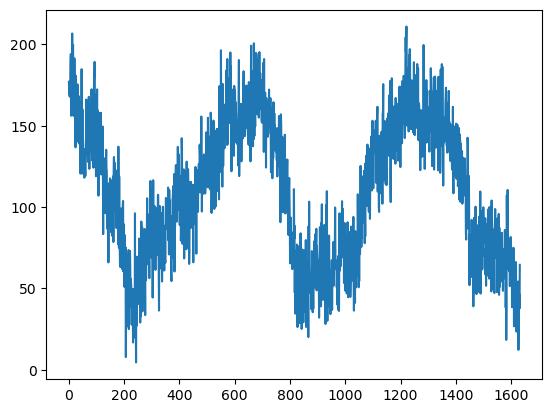

In [7]:
plt.plot(train_CSI_modulus[1,0,0,:])

### You can try different CSI processing methods here:
#### 1. Use FFT to change frequency CSI to time domain CSI 
#### 2. Calculate the total Power of the CSI signal 

###  CSI Processing: Normalize to [0,1]

In [ ]:
max_value_train = torch.max(train_CSI_modulus)
min_value_train = torch.min(train_CSI_modulus)
range_value = max_value_train - min_value_train

train_CSI_normalize = (train_CSI_modulus - min_value_train)/range_value
valid_CSI_normalize = (valid_CSI_modulus - min_value_train)/range_value

## Define a neural network model and train the model